In [1]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

--2019-10-23 01:04:02--  http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Распознаётся archive.ics.uci.edu (archive.ics.uci.edu)… 128.195.10.252
Подключение к archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 3974305 (3,8M) [application/x-httpd-php]
Сохранение в: «adult.data»

adult.data          100%[===================>]   3,79M   518KB/s    за 8,6s    

2019-10-23 01:04:12 (450 KB/s) - «adult.data» сохранён [3974305/3974305]



In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("adult.data", names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'result']) 
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## 1. How many males and females are there?

In [3]:
data.sex.value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

## 2. What is the mean male age?

In [4]:
data.age[data.sex == ' Male'].mean()

39.43354749885268

## 3. What is the proportion of the US citizens?

In [5]:
data['native-country'][data['native-country'] == ' United-States'].shape[0] / data.shape[0]

0.895857006848684

## 4. Plot the distribution of people’s education as a bar plot.

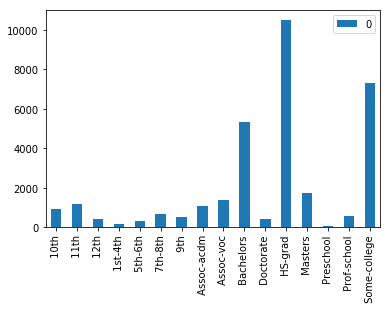

In [17]:
education = {}
for i in data['education']:
    if i not in education:
        education[i] = 0
    education[i] += 1

    
pd.DataFrame([education]).T.plot(kind='bar')
plt.show()

## 5. What is the mean and standard deviation of the ”final weight” for divorced people?

In [19]:
data.fnlwgt[data['marital-status'] == ' Divorced'].describe()

count    4.443000e+03
mean     1.858028e+05
std      1.056468e+05
min      1.941000e+04
25%      1.155825e+05
50%      1.753700e+05
75%      2.310475e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

## 6. Is it true that the people who receive over 50k are mostly highly educated?

In [20]:
result = 0
result += data.education[data.result == ' >50K'][data.education == ' Bachelors'].count()
result += data.education[data.result == ' >50K'][data.education == ' Masters'].count()
result += data.education[data.result == ' >50K'][data.education == ' Doctorate'].count()
result / data.education[data.result == ' >50K'].count()

0.4445861497258003

## Нет

## 7. What is the maximum male and female age for each race?

In [34]:
data.age[data.race == ' White'][data.sex == ' Male'].describe()['max']

90.0

In [35]:
data.age[data.race == ' White'][data.sex == ' Female'].describe()['max']

90.0

In [36]:
data.age[data.race == ' Black'][data.sex == ' Male'].describe()['max']

90.0

In [37]:
data.age[data.race == ' Black'][data.sex == ' Female'].describe()['max']

90.0

In [43]:
data.age[data.race == ' Amer-Indian-Eskimo'][data.sex == ' Male'].describe()['max']

82.0

In [44]:
data.age[data.race == ' Amer-Indian-Eskimo'][data.sex == ' Female'].describe()['max']

80.0

In [45]:
data.age[data.race == ' Asian-Pac-Islander'][data.sex == ' Male'].describe()['max']

90.0

In [46]:
data.age[data.race == ' Asian-Pac-Islander'][data.sex == ' Female'].describe()['max']

75.0

In [47]:
data.age[data.race == ' Other'][data.sex == ' Male'].describe()['max']

77.0

In [50]:
data.age[data.race == ' Other'][data.sex == ' Female'].describe()['max']

74.0

## 8. The people from which countries work as farmers/fishers?

In [53]:
data['native-country'][data.occupation == ' Farming-fishing'].unique()

array([' United-States', ' Cambodia', ' Poland', ' Guatemala', ' Mexico',
       ' England', ' ?', ' Philippines', ' Italy', ' Puerto-Rico',
       ' Vietnam', ' Germany', ' Japan', ' Canada', ' Yugoslavia',
       ' Cuba', ' Portugal', ' El-Salvador', ' Hong', ' Ireland',
       ' France'], dtype=object)

## 9. Consider the ratio of the number of 1) male bachelors to male masters, and 2) female bachelors to female masters. Which one is higher?

In [65]:
result_1 = data.education[data.sex == ' Male'][data.education == ' Bachelors'].count() \
                        / data.education[data.sex == ' Male'][data.education == ' Masters'].count()

In [66]:
result_1

3.14743049705139

In [69]:
result_2 = data.education[data.sex == ' Female'][data.education == ' Bachelors'].count() \
                        / data.education[data.sex == ' Female'][data.education == ' Masters'].count()

In [70]:
result_2

3.0205223880597014

## Первое отношение

## 10. What is the largest number of hours a person works a week? How many people who work this number of hours are there? What is their income?

In [62]:
data['hours-per-week'].max()

99

In [71]:
data['hours-per-week'][data['hours-per-week'] == 99].count()

85

In [76]:
data.result[data['hours-per-week'] == 99].describe().top

' <=50K'